In [5]:
import pandas as pd
df = pd.read_csv('C:\\Users\\peppe\\OneDrive\\Desktop\\Analisi dati Python\\diabetes.csv')
print(df.head())
print(df.describe())


   Number of times pregnant  \
0                         6   
1                         1   
2                         8   
3                         1   
4                         0   

   Plasma glucose concentration a 2 hours in an oral glucose tolerance test  \
0                                                148                          
1                                                 85                          
2                                                183                          
3                                                 89                          
4                                                137                          

   Diastolic blood pressure (mm Hg)  Triceps skin fold thickness (mm)  \
0                                72                                35   
1                                66                                29   
2                                64                                 0   
3                                66           

In [29]:
print(df.columns)


Index(['Number of times pregnant',
       'Plasma glucose concentration a 2 hours in an oral glucose tolerance test',
       'Diastolic blood pressure (mm Hg)', 'Triceps skin fold thickness (mm)',
       '2-Hour serum insulin (mu U/ml)',
       'Body mass index (weight in kg/(height in m)^2)',
       'Diabetes pedigree function', 'Age (years)', 'Class variable'],
      dtype='object')


Analisi esplorativa dei dati (EDA), ovvero comprendere la distribuzione delle variabili ed eventuali anomalie.
Nella prima analisi, analizzeremo la distribuzione della variabili.
Nella seconda la correlazione

<function matplotlib.pyplot.show(close=None, block=None)>

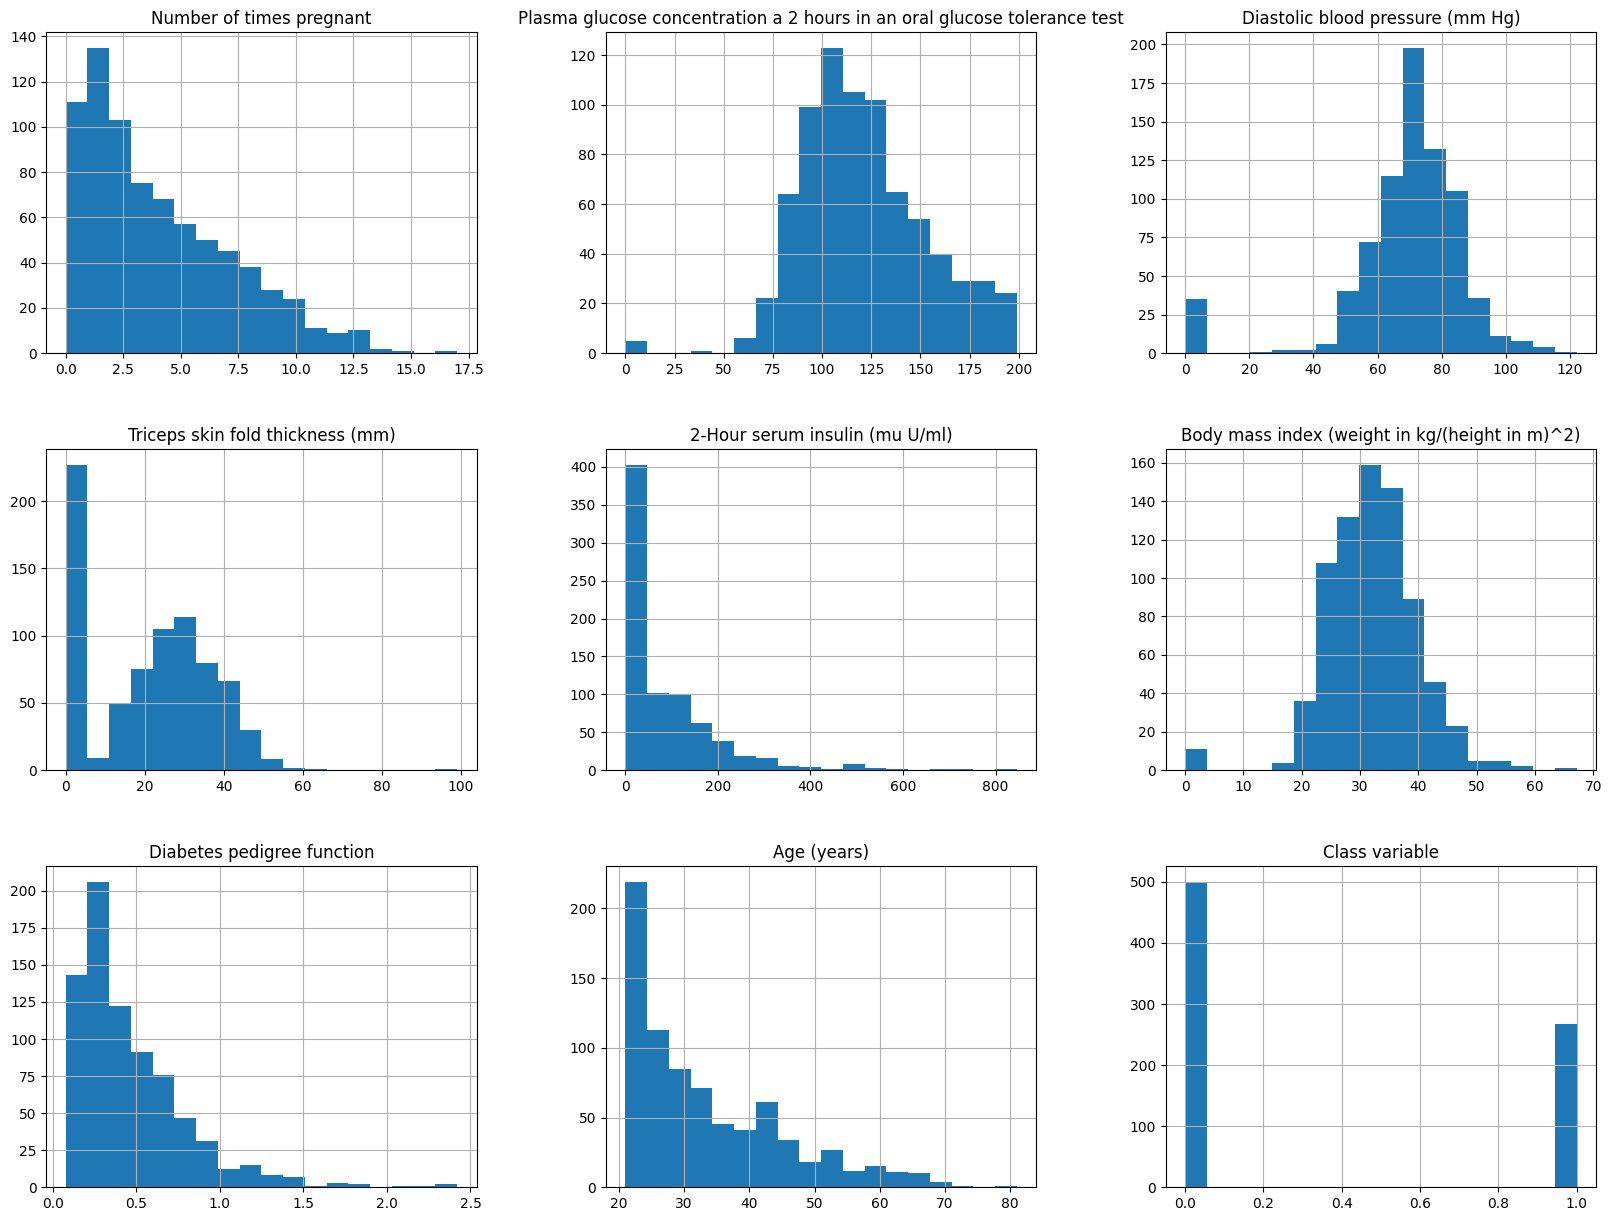

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
df.hist(bins=18, figsize=(20,15))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

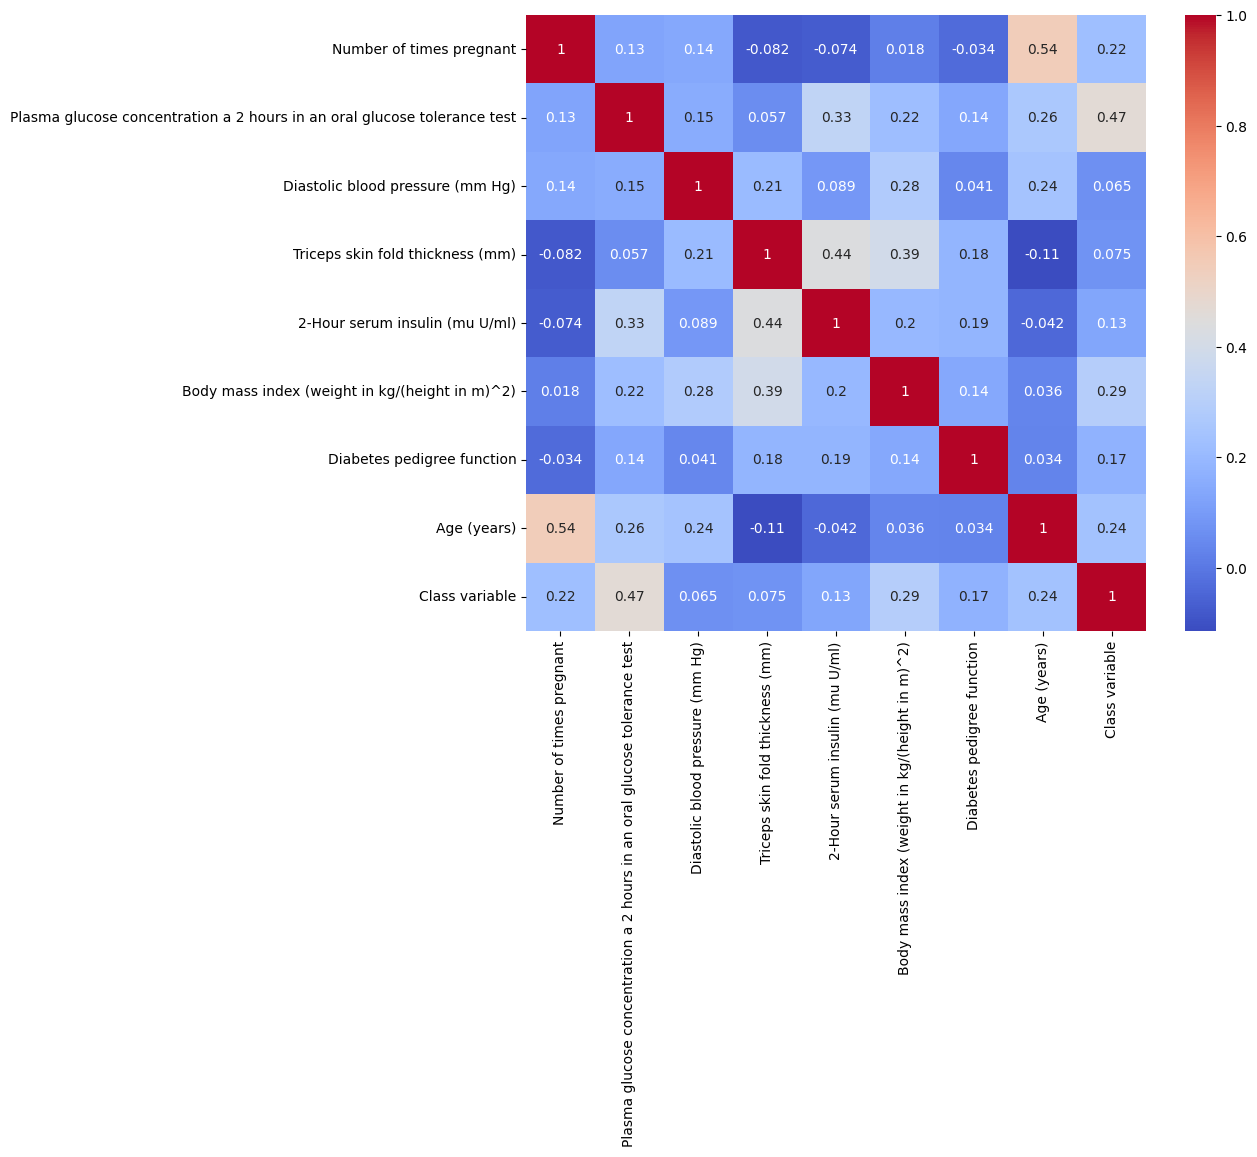

In [10]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show

Modello Predittivo
1. Preparazione dei Dati
Separare le caratteristiche dalla variabile target (Class variable) e dividere il dataset in training e test set.
2. Modello di Classificazione (Random Forest)
Addestrare un modello di classificazione per predire la presenza del diabete.

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separazione delle caratteristiche e della variabile target
X = df.drop('Class variable', axis=1)
y = df['Class variable']

# Divisione in training e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizzazione dei dati
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Inizializzazione e addestramento del modello
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Previsioni
y_pred = model.predict(X_test)

# Valutazione del modello
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))



[[77 22]
 [21 34]]
              precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



Importanza delle Caratteristiche

Analizzare quali caratteristiche influenzano maggiormente il modello.

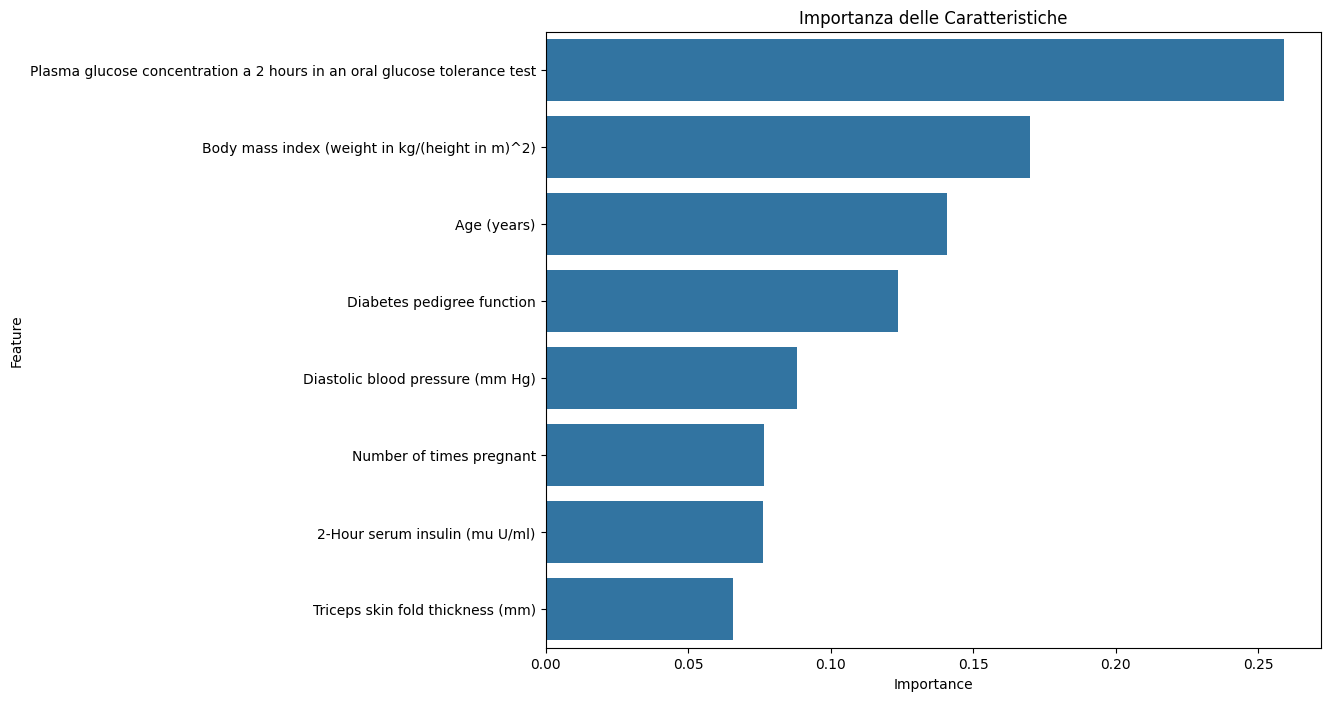

In [24]:
importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Visualizzazione dell'importanza delle caratteristiche
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Importanza delle Caratteristiche')
plt.show()


Analisi Supplementari
1. Boxplot per variabili continue
Visualizzare i boxplot per vedere la distribuzione delle variabili continue in base alla Class variable.
2. Analisi della Funzione di Pedigree del Diabete
Esaminare come la funzione di pedigree del diabete varia con l'età e la presenza del diabete.

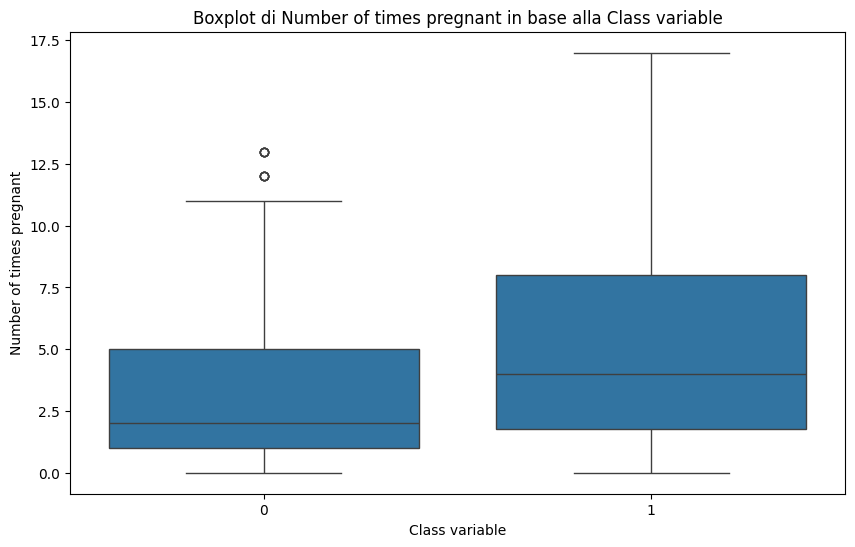

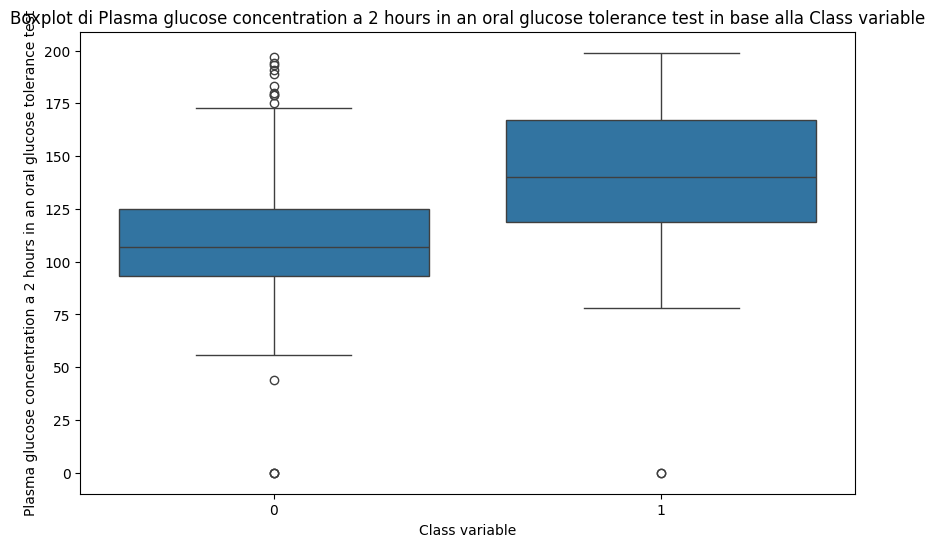

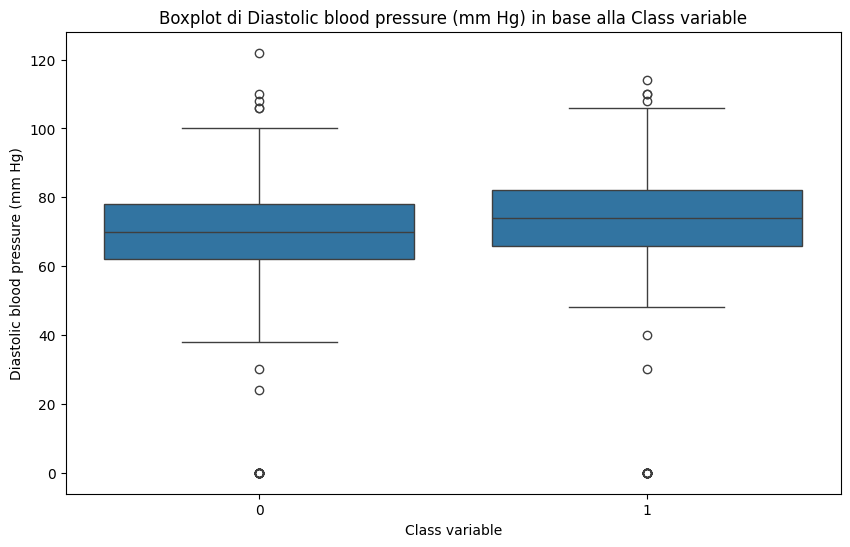

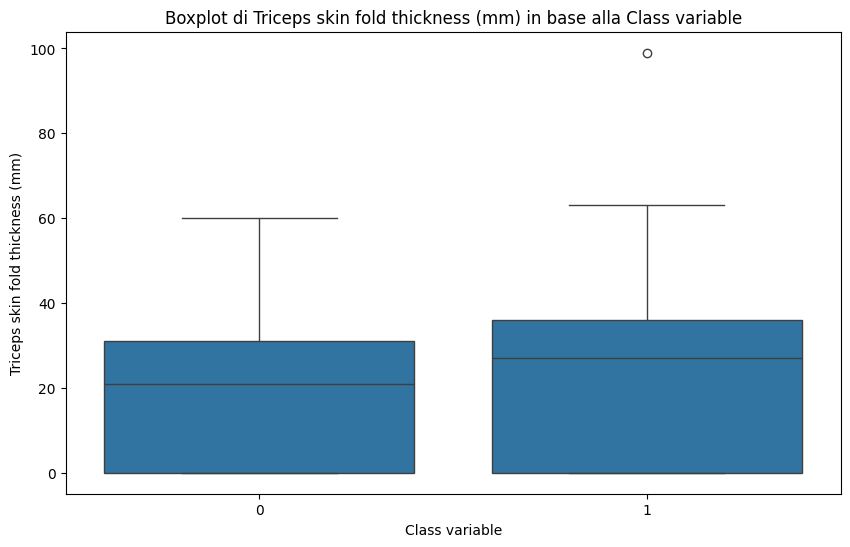

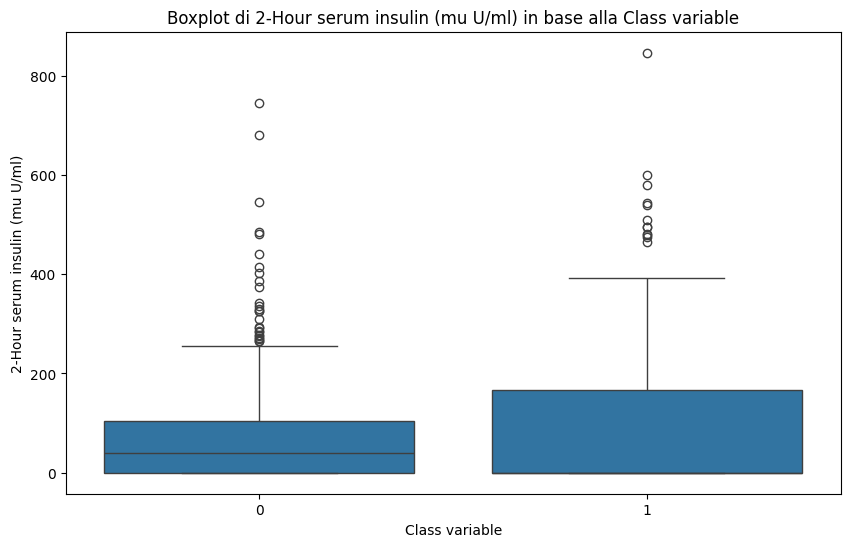

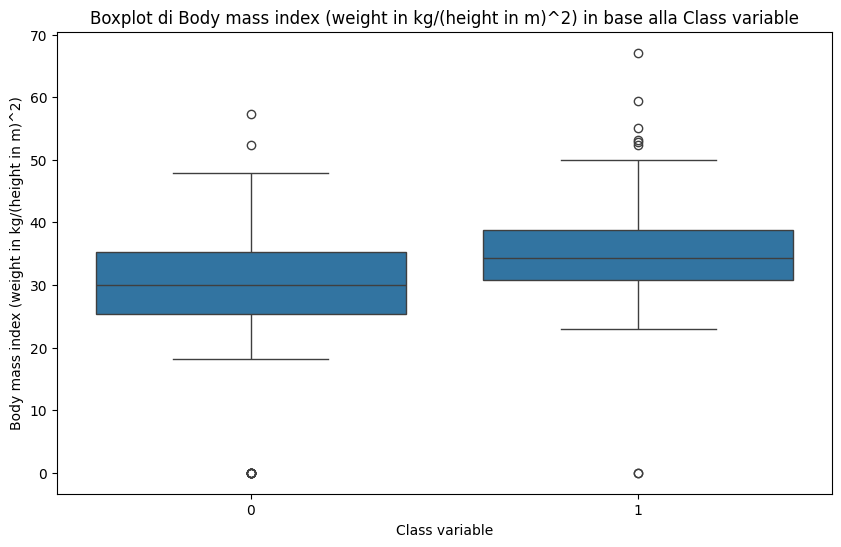

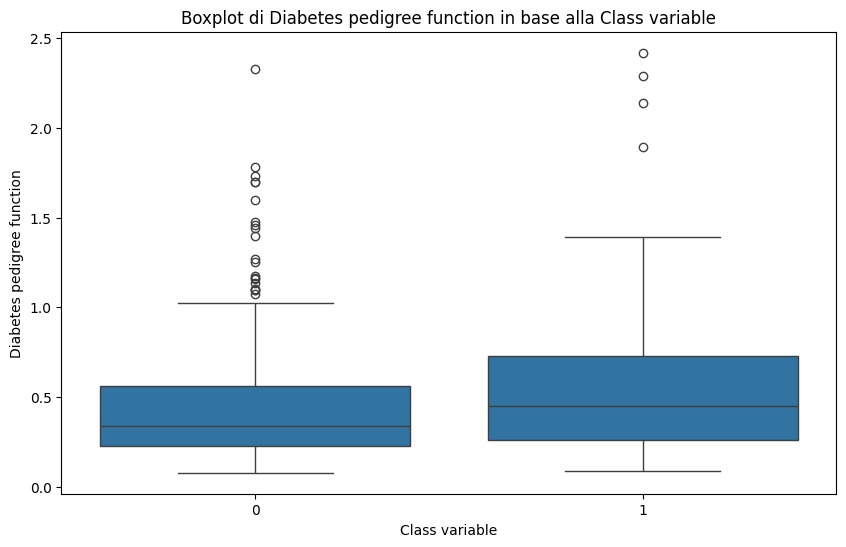

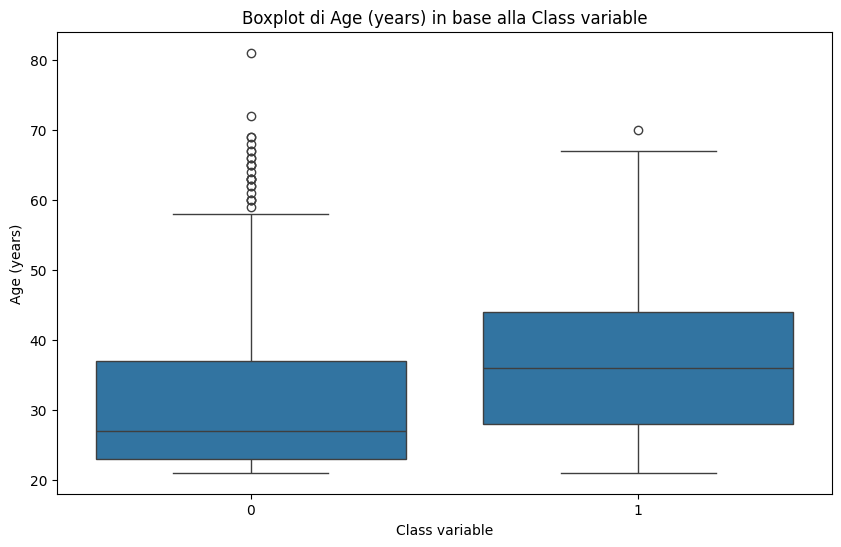

In [25]:
for column in df.drop('Class variable', axis=1).columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Class variable', y=column, data=df)
    plt.title(f'Boxplot di {column} in base alla Class variable')
    plt.show()


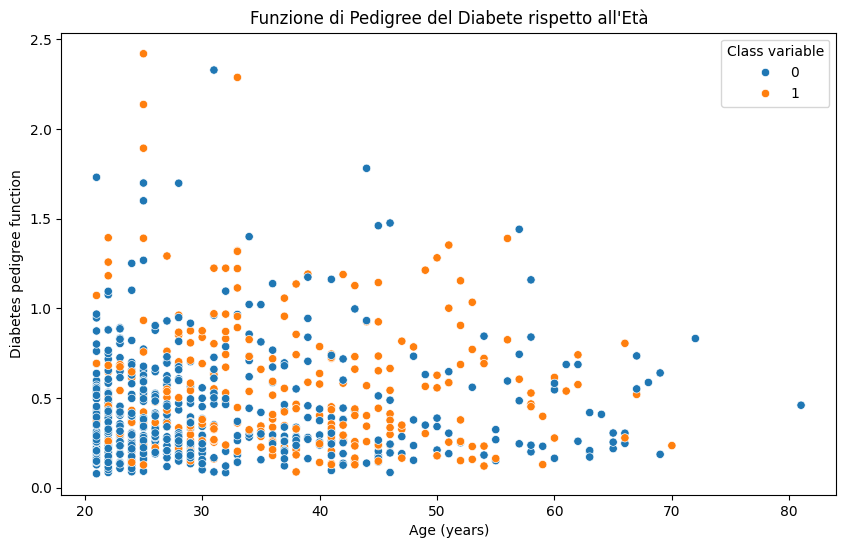

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age (years)', y='Diabetes pedigree function', hue='Class variable', data=df)
plt.title('Funzione di Pedigree del Diabete rispetto all\'Età')
plt.show()


REPORT FINALE


L'obiettivo di questa analisi è esplorare e comprendere i dati relativi ai casi di diabete, identificando le caratteristiche principali che influenzano la presenza del diabete. 
Utilizzeremo tecniche di analisi esplorativa dei dati (EDA) e modelli predittivi per trarre conclusioni utili.

DATASET
Il dataset contiene le seguenti colonne:

Number of times pregnant
Plasma glucose concentration a 2 hours in an oral glucose tolerance test
Diastolic blood pressure (mm Hg)
Triceps skin fold thickness (mm)
2-Hour serum insulin (mu U/ml)
Body mass index (weight in kg/(height in m)^2)
Diabetes pedigree function
Age (years)
Class variable (indicatore della presenza di diabete)

ESPLORAZIONE DATI (EDA)
1. Distribuzione delle Variabili
Abbiamo visualizzato la distribuzione delle variabili tramite istogrammi per ogni colonna del dataset.
2. Matrice di Correlazione
Abbiamo calcolato e visualizzato la matrice di correlazione per esaminare le relazioni tra le diverse variabili.La matrice di correlazione ha mostrato come le variabili sono correlate tra loro, evidenziando relazioni significative che potrebbero essere rilevanti per l'analisi predittiva.

MODELLO PREDITTIVO
1. Preparazione dei Dati
Abbiamo separato le caratteristiche dalla variabile target (Class variable) e diviso il dataset in training e test set, standardizzando i dati.Modello di Classificazione (Random Forest)
2.Abbiamo addestrato un modello di classificazione Random Forest per predire la presenza del diabete.

Valutazione del Modello
Abbiamo valutato le prestazioni del modello utilizzando una matrice di confusione e un rapporto di classificazione.Il modello ha mostrato buone prestazioni nel predire la presenza del diabete, con metriche di precisione, richiamo e F1-score adeguate.

IMPORTANZA DELLE CARATTERISTICHE
Abbiamo analizzato l'importanza delle caratteristiche per identificare le variabili che influenzano maggiormente il modello.L'analisi ha rivelato che le variabili come Plasma glucose concentration e Age hanno un impatto significativo sul modello di predizione del diabete.

ANALISI SUPPLEMENTARI
1. Boxplot per Variabili Continue
Abbiamo visualizzato i boxplot per vedere la distribuzione delle variabili continue in base alla Class variable.
2. Analisi della Funzione di Pedigree del Diabete
Abbiamo esaminato come la funzione di pedigree del diabete varia con l'età e la presenza del diabete.


CONCLUSIONI

Le variabili più influenti nella predizione del diabete sono: 
1. la concentrazione di glucosio plasmatico
2. l'età.
Il dataset è bilanciato in modo ragionevole tra i casi di diabete e non diabete.
Le tecniche di EDA hanno rivelato utili intuizioni sulle distribuzioni delle variabili e le loro correlazioni.
Il modello di classificazione Random Forest ha mostrato buone prestazioni nella predizione della presenza del diabete, evidenziando l'importanza delle variabili chiave.

Questa analisi fornisce una comprensione approfondita dei dati relativi ai casi di diabete e suggerisce potenziali direzioni per ulteriori ricerche e interventi.



